# Richter's Predictor: Modeling Earthquake Damage
Based on aspects of building location and construction, the goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.  This competition is hosted by [DrivenData](https://www.drivendata.org/competitions/57/nepal-earthquake/page/134/).

<img src="./images/nepal-quake-bm-2.JPG" width="50%" />

The data was collected through surveys by the Central Bureau of Statistics that work under the National Planning Commission Secretariat of Nepal. This survey is one of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

# The Data
Data is mostly about building structure and ownership. Each row represents a building that was hit during the earthquake.  There are **39** columns, where `building_id` is a unique random identifier.  The remaining 38 are described below.  Categorical variables have been obfuscated to random lowercase ASCII.  These characters appearing in different columns is purely by coincidence and does not signify a relationship.

* `geo_level_1_id`, `geo_level_2_id`, `geo_level_3_id` (type: `int`): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
* `count_floors_pre_eq` (type: `int`): number of floors in the building before the earthquake.
* `age` (type: `int`): age of the building in years.
* `area_percentage` (type: `int`): normalized area of the building footprint.
* `height_percentage` (type: `int`): normalized height of the building footprint.
* `land_surface_condition` (type: `categorical`): surface condition of the land where the building was built. Possible values: n, o, t.
* `foundation_type` (type: `categorical`): type of foundation used while building. Possible values: h, i, r, u, w.
* `roof_type` (type: `categorical`): type of roof used while building. Possible values: n, q, x.
* `ground_floor_type` (type: `categorical`): type of the ground floor. Possible values: f, m, v, x, z.
* `other_floor_type` (type: `categorical`): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
* `position` (type: `categorical`): position of the building. Possible values: j, o, s, t.
* `plan_configuration` (type: `categorical`): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
* `has_superstructure_adobe_mud` (type: `binary`): flag variable that indicates if the superstructure was made of Adobe/Mud.
* `has_superstructure_mud_mortar_stone` (type: `binary`): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
* `has_superstructure_stone_flag` (type: `binary`): flag variable that indicates if the superstructure was made of Stone.
* `has_superstructure_cement_mortar_stone` (type: `binary`): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
* `has_superstructure_mud_mortar_brick` (type: `binary`): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
* `has_superstructure_cement_mortar_brick` (type: `binary`): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
* `has_superstructure_timber` (type: `binary`): flag variable that indicates if the superstructure was made of Timber.
* `has_superstructure_bamboo` (type: `binary`): flag variable that indicates if the superstructure was made of Bamboo.
* `has_superstructure_rc_non_engineered` (type: `binary`): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
* `has_superstructure_rc_engineered` (type: `binary`): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
* `has_superstructure_other` (type: `binary`): flag variable that indicates if the superstructure was made of any other material.
* `legal_ownership_status` (type: `categorical`): legal ownership status of the land where building was built. Possible values: a, r, v, w.
* `count_families` (type: `int`): number of families that live in the building.
* `has_secondary_use` (type: `binary`): flag variable that indicates if the building was used for any secondary purpose.
* `has_secondary_use_agriculture` (type: `binary`): flag variable that indicates if the building was used for agricultural purposes.
* `has_secondary_use_hotel` (type: `binary`): flag variable that indicates if the building was used as a hotel.
* `has_secondary_use_rental` (type: `binary`): flag variable that indicates if the building was used for rental purposes.
* `has_secondary_use_institution` (type: `binary`): flag variable that indicates if the building was used as a location of any institution.
* `has_secondary_use_school` (type: `binary`): flag variable that indicates if the building was used as a school.
* `has_secondary_use_industry` (type: `binary`): flag variable that indicates if the building was used for industrial purposes.
* `has_secondary_use_health_post` (type: `binary`): flag variable that indicates if the building was used as a health post.
* `has_secondary_use_gov_office` (type: `binary`): flag variable that indicates if the building was used fas a government office.
* `has_secondary_use_use_police` (type: `binary`): flag variable that indicates if the building was used as a police station.
* `has_secondary_use_other` (type: `binary`): flag variable that indicates if the building was secondarily used for other purposes.

# Performance Metric
The output should be, for each building, a value from `1`, `2`, or `3`, **as an integer**, where `1` represents low damage, `2` represents medium damage, and `3` represents almost complete destruction.  The metric used is the **micro-averaged F1 score**.

$F_\text{micro} = \frac{2 \cdot P_\text{micro} \cdot R_\text{micro}}{P_\text{micro} + R_\text{micro}}$

where

$P_\text{micro} = \frac{\sum^3_{k=1} T P_k}{\sum^3_{k=1} (T P_k + F P_k)}$, $R_\text{micro} = \frac{\sum^3_{k=1} T P_k}{\sum^3_{k=1} (T P_k + F N_k)}$

and

$TP$ is True Positive, $FP$ is False Positive, $FN$ is False NEgative, and $k$ represents each class `1,2,3`.

In Python, this loss can be calculated using `sklearn.metrics.f1_score` with the keyword `average='micro'`.

# Data loading and checking
Let's begin by loading in the data that we need.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500) # Show all columns in notebooks.

# Load in and merge both the training values and labels at the same time.
train = pd.merge(pd.read_csv('./data/train-values.csv'), pd.read_csv('./data/train-labels.csv'), on='building_id')

# Load in the test data.
test = pd.read_csv('./data/test.csv')

What does the data look like?

In [2]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [3]:
test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


Are there any null values we should be aware of?

In [4]:
print('{} missing train values.'.format(sum(train.isnull().any(1))))
print('{} missing test values.'.format(sum(test.isnull().any(1))))

0 missing train values.
0 missing test values.


It's a good idea to go through all of these columns and check if the ranges (min and max) match that of the feature descriptions.  In this case, they do.

In [5]:
train.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
test.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,8.686800e+04,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000
mean,5.266279e+05,13.888198,704.128125,6261.758565,2.133145,26.550168,8.013906,5.436098,0.089953,0.762502,0.034466,0.018568,0.067459,0.073836,0.253534,0.083679,0.042501,0.015794,0.015207,0.983112,0.111468,0.064097,0.033867,0.008242,0.001013,0.000368,0.001002,0.000104,0.000115,0.000046,0.004904
std,3.037828e+05,8.029576,413.364015,3648.712191,0.728047,73.413489,4.377899,1.906950,0.286115,0.425552,0.182424,0.134996,0.250816,0.261506,0.435036,0.276907,0.201731,0.124679,0.122376,0.422363,0.314713,0.244928,0.180889,0.090413,0.031812,0.019190,0.031631,0.010178,0.010729,0.006786,0.069857
min,7.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.644215e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.269835e+05,12.000000,709.000000,6276.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.890842e+05,21.000000,1054.000000,9416.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052923e+06,30.000000,1427.000000,12567.000000,8.000000,995.000000,92.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's double check the categorical values, too.

In [7]:
categoricals = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']

# Train.
print('Train')
for cat in categoricals:
    print('  {}: {}'.format(cat, train[cat].unique()))

# Test.
print('\nTest')
for cat in categoricals:
    print('  {}: {}'.format(cat, test[cat].unique()))

Train
  land_surface_condition: ['t' 'o' 'n']
  foundation_type: ['r' 'w' 'i' 'u' 'h']
  roof_type: ['n' 'q' 'x']
  ground_floor_type: ['f' 'x' 'v' 'z' 'm']
  other_floor_type: ['q' 'x' 'j' 's']
  position: ['t' 's' 'j' 'o']
  plan_configuration: ['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
  legal_ownership_status: ['v' 'a' 'r' 'w']

Test
  land_surface_condition: ['t' 'n' 'o']
  foundation_type: ['r' 'w' 'u' 'h' 'i']
  roof_type: ['n' 'x' 'q']
  ground_floor_type: ['f' 'v' 'x' 'm' 'z']
  other_floor_type: ['q' 'j' 'x' 's']
  position: ['s' 't' 'j' 'o']
  plan_configuration: ['d' 'u' 'q' 'a' 'c' 'm' 's' 'o' 'f' 'n']
  legal_ownership_status: ['v' 'a' 'w' 'r']


There appears to be no missing values, and all present values are within reasonable ranges.  Let's move on to data preparation.

# Data preparation
We're going to do a few small tweaks and observations before we begin to select appropriate features for our model.

## Outcome distribution
Before we start, let's check the balance of the classes that we are trying to predict.  `1` is little damage, `2` is moderate damage, and `3` is close to destroyed.  As can be seen below, the most common is `2`, by quite a margin, followed by `3` and `1`.  Our classes are not close to evenly balanced, which could throw off our prediction (it may be great at recognizing `2` but not `1`, for example).  A more advanced solution may use sampling methods to artificially balance the classes.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg'] # Render SVG for plots - looks nicer!
plt.style.use('seaborn-ticks') # The default style is ugly.

import seaborn as sns

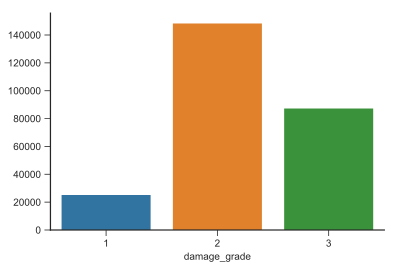

In [9]:
g = sns.countplot(train.damage_grade)
sns.despine()
g.set_xlabel('damage_grade')
g.set_ylabel('')
plt.show()

## Removing Building ID
We definitely do not need the building ID for the training data.  The building ID from the testing data is stored separately as we need it for submission later.

In [10]:
# Drop from train.
train.drop('building_id', axis=1, inplace=True)

# Store, then drop from test.
test_building_id = test.building_id
test.drop('building_id', axis=1, inplace=True)

## Categorical encoding
We have a handful of categorical values that need encoding.  They are not extreme in number, so a simple one hot encoding should suffice.

In [11]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Create and fit encoder.
train_categorical_cols = train.select_dtypes('object').columns
encoder = OneHotEncoder(sparse=False, dtype=np.int, handle_unknown='ignore')
encoder.fit(train[train_categorical_cols])

# Transform train data.
train = pd.concat([
    train.drop(train_categorical_cols, axis=1),
    pd.DataFrame(encoder.transform(train[train_categorical_cols]), columns=encoder.get_feature_names(train_categorical_cols))
], axis=1)

# Transform test data.
test_categorical_cols = test.select_dtypes('object').columns
test = pd.concat([
    test.drop(test_categorical_cols, axis=1),
    pd.DataFrame(encoder.transform(test[test_categorical_cols]), columns=encoder.get_feature_names(test_categorical_cols))
], axis=1)

## Feature selection using `SelectKBest`
Now that we have all features laid out, let's use `SelectKBest` to select a number of 'best scoring' parameters.  We'll also create our `X` and `y` here, too.

In [12]:
X = train.drop('damage_grade', axis=1)
y = train.damage_grade

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

# Calculate the actual features.
num_features = 15
best_features = SelectKBest(score_func=chi2, k=num_features)
best_features.fit(X, y)

# Filter out the train and test set.
best_indices = best_features.get_support(indices=True)
X = X[X.columns[best_indices]]
test = test[test.columns[best_indices]]

pd.DataFrame(zip(X.columns, best_features.scores_), columns=['Feature', 'Score']).sort_values('Score', ascending=False).head(num_features)

,Feature,Score
1,geo_level_2_id,128238.967548
4,area_percentage,89437.601578
2,geo_level_3_id,83664.759136
0,geo_level_1_id,24186.950757
12,ground_floor_type_v,18949.414382
5,has_superstructure_mud_mortar_stone,11938.314627
8,has_superstructure_rc_engineered,6969.601844
7,has_superstructure_rc_non_engineered,1340.145544
3,age,1241.172305
9,foundation_type_i,1108.404575


## Correlations
Let's now look at the correlations between all selected features.  There are a few questionable correlations, but they can be left for now as an area for improvement.

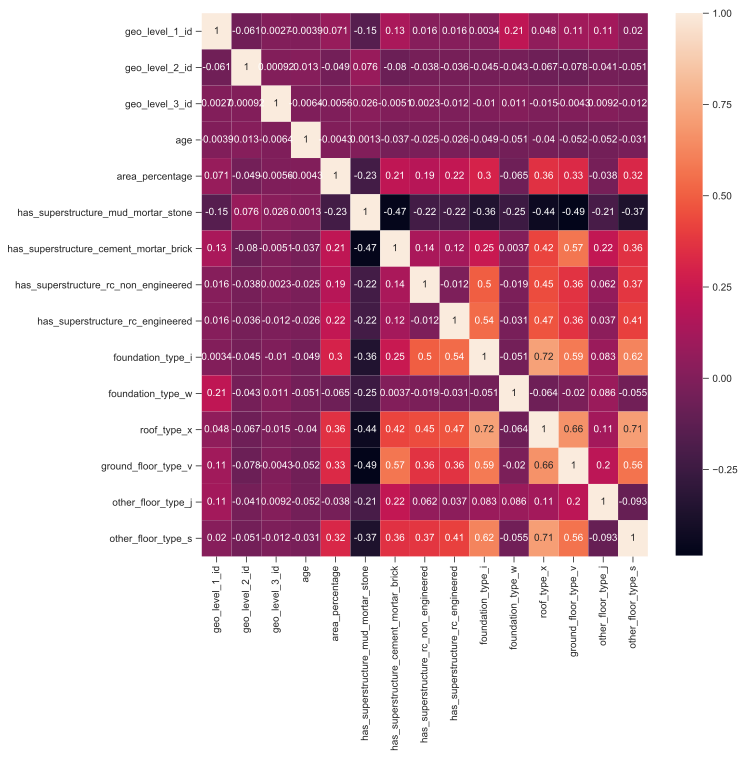

,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,foundation_type_i,foundation_type_w,roof_type_x,ground_floor_type_v,other_floor_type_j,other_floor_type_s
geo_level_1_id,1,-0.0614049,0.00271845,-0.00390763,0.0711582,-0.152038,0.134121,0.0164539,0.0157667,0.00336226,0.212048,0.0482723,0.110563,0.112915,0.0203167
geo_level_2_id,-0.0614049,1,0.000921093,0.0125938,-0.0494433,0.0764913,-0.0798752,-0.038173,-0.0360739,-0.0448933,-0.0428306,-0.0671519,-0.0782789,-0.0408807,-0.0505743
geo_level_3_id,0.00271845,0.000921093,1,-0.00638459,-0.00564264,0.0262944,-0.00511571,0.00226545,-0.0124203,-0.0104942,0.0106205,-0.0146348,-0.00432492,0.00916037,-0.0123375
age,-0.00390763,0.0125938,-0.00638459,1,-0.00432251,0.00132126,-0.0369919,-0.0254314,-0.0255518,-0.04886,-0.051184,-0.0400871,-0.0523419,-0.0516336,-0.0310447
area_percentage,0.0711582,-0.0494433,-0.00564264,-0.00432251,1,-0.225541,0.2108,0.185047,0.224647,0.301688,-0.0648492,0.357777,0.32815,-0.0375121,0.317857
has_superstructure_mud_mortar_stone,-0.152038,0.0764913,0.0262944,0.00132126,-0.225541,1,-0.470715,-0.222366,-0.224509,-0.359323,-0.251562,-0.437898,-0.487756,-0.206889,-0.366995
has_superstructure_cement_mortar_brick,0.134121,-0.0798752,-0.00511571,-0.0369919,0.2108,-0.470715,1,0.138915,0.12107,0.24629,0.00367678,0.419886,0.573645,0.224796,0.356077
has_superstructure_rc_non_engineered,0.0164539,-0.038173,0.00226545,-0.0254314,0.185047,-0.222366,0.138915,1,-0.0123244,0.499215,-0.0192557,0.445971,0.362685,0.0622071,0.373658
has_superstructure_rc_engineered,0.0157667,-0.0360739,-0.0124203,-0.0255518,0.224647,-0.224509,0.12107,-0.0123244,1,0.540876,-0.0307147,0.466875,0.362155,0.0373064,0.412847
foundation_type_i,0.00336226,-0.0448933,-0.0104942,-0.04886,0.301688,-0.359323,0.24629,0.499215,0.540876,1,-0.0510469,0.718842,0.586806,0.0828589,0.617345


In [14]:
train_corr = X.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(train_corr, xticklabels=train_corr.columns, yticklabels=train_corr.columns, annot=True)
plt.show()

train_corr.style.background_gradient(sns.diverging_palette(220, 10, as_cmap=True), axis=1)

# Modeling
Now we can make our model!

## Skewness
The `age` column is rather skewed right.  There is a few old buildings which cause this skew.  Usually they could be removed, but the test data also contains old buildings.  Instead, to normalize the skew, we can just log the value.

In [15]:
X.age.skew()

12.192494218852833

In [16]:
X['age'] = np.log(X.age.replace(0, np.nan)).replace(np.nan, 0)

In [17]:
X.age.skew()

-0.6002655590862277

## Feature scaling
Since our values are all on different scales, we should normalize them first.

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Create and apply to train.
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X)
# Apply to test.
test[test.columns] = scaler.transform(test)

## Fitting
Let's now build and fit the model.

In [19]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [20]:
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

kfold = KFold(n_splits=5)

rf_params = {
    'n_estimators': [200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [2, 4, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_split': [2, 3, 4, 5]
}

cv_rf = RandomizedSearchCV(
    RandomForestClassifier(bootstrap=False, random_state=42),
    rf_params,
    n_iter=40, cv=kfold, scoring=['accuracy', 'f1_micro'], random_state=42, n_jobs=-1, iid=True, refit='f1_micro'
)
cv_rf.fit(X, y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fractio...
                                                    oob_score=False,
     

Random Forest: 0.7015053664414181 / {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 20}


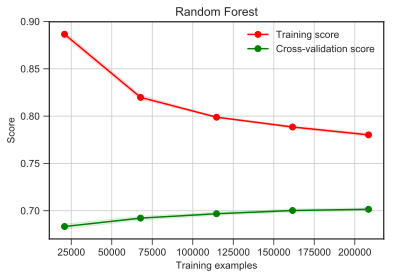

In [21]:
print('Random Forest: {} / {}'.format(cv_rf.best_score_, cv_rf.best_params_))

plot_learning_curve(cv_rf.best_estimator_, 'Random Forest', X, y, cv=kfold)
plt.show()

It appears above that there is a bit of overfitting going on. This mixup is possibly due to the high correlation between some features, an unbalanced prediction variable, and perhaps too many 'best features'.  This was a rather automated approach to solving this problem in that features were selected semi-automatically and then placed into a model.  This particular session reported ~70%, and gained 67.73% online, so perhaps it's not as bad as it looks.  Training time is a killer here, with the Random Forest training (and even the plot above) taking way too long.

# Predict

In [22]:
preds = cv_rf.predict(test)

In [23]:
submission = pd.DataFrame({
    'building_id': test_building_id,
    'damage_grade': preds
})

submission.to_csv('./submit.csv', index=False)